In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cars = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
cars

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
cars1= cars.copy()
cars1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
cars1.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
cars1.shape

(1436, 11)

There are no null values in the given dataset.

In [ ]:
cars1.duplicated().sum()

1

thier is only one duplicated value in the dataset.

In [ ]:
cars1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
cars1[cars1.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


this is the duplicated row in the given dataset, so we need to drop the duplicate one.

In [ ]:
cars1 = cars.drop_duplicates(ignore_index=True)
cars1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


their are now 1435 X 14 but previously we are having 1436 X 14 because we have dropped one row i.e. duplicated row.  

In [ ]:
numerics = ['Price', 'Age_08_04','KM','HP','Automatic','Cylinders','cc','Doors','Gears','Weight']  # Replace with actual numerical column names


<Axes: >

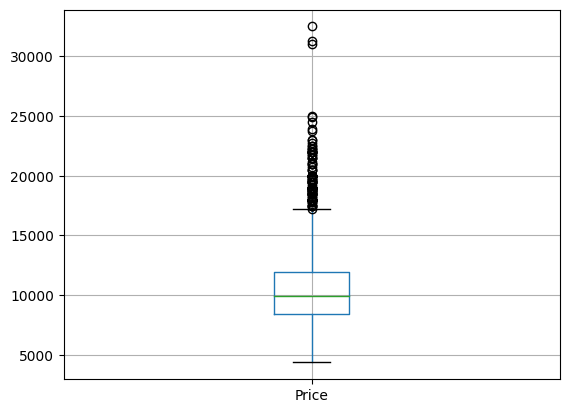

In [ ]:
cars1.boxplot('Price')

In [ ]:
cars1[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.575869
Weight,0.575869,1.000000


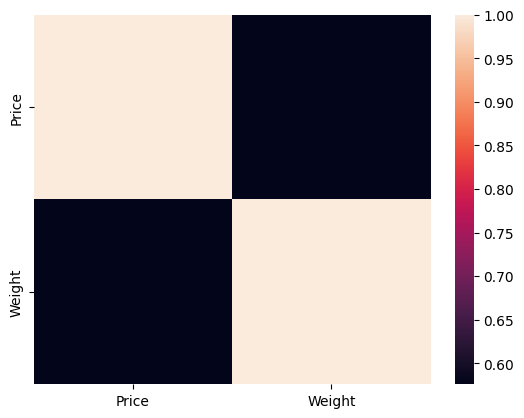

In [ ]:
sns.heatmap(cars1[['Price','Weight']].corr())
plt.show()

In [ ]:
lab_encoder = LabelEncoder()

In [ ]:
cars1['Fuel_Type'] = lab_encoder.fit_transform(cars1['Fuel_Type'])
cars1['Fuel_Type']

,Fuel_Type
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,1


In [ ]:
cars1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,7250,70,16916,2,86,0,1300,3,4,5,1015


**PREPARE** **MODEL**

In [ ]:
target = cars1['Price']

Here we will be taking price as target variable to determine the vehicle price in the given dataset .

In [ ]:
features = cars1.drop('Price', axis=1)

In this we need to drop price column for the test data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)

in the above command we using the command to spilt the train and test data.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 10)
(1148,)
(287, 10)
(287,)


In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
y_pred

array([10771.2771743 , 10336.13685636,  9300.14645287,  9383.27822615,
        8435.76785895,  8445.30068545,  7936.52725684,  8286.94272138,
       11767.14335883, 12375.17502016,  9479.95897656,  9353.10818538,
       13188.73160423, 12233.66757083,  8967.21646198, 11552.49130967,
       12313.21744619, 17508.98900451,  9955.97624331, 11465.13575011,
       11490.36200939, 18077.25831313,  9819.07059707, 10397.12949576,
        7419.22646204, 16012.96400703,  7106.33604153,  8333.42756975,
       15617.83563246, 13859.06122019,  8182.55429566, 10474.07520907,
       10113.64693143, 10140.65103679, 10035.58555088,  8641.96418298,
        8828.64778893, 10006.4081339 , 16328.91829034, 10681.62924074,
        8767.35122328,  9543.94520414, 10172.74049349,  8543.02605237,
       10585.06079855, 17603.67456708, 10440.81994029,  9228.6621402 ,
       10687.78430641, 12510.29417278, 12854.76621102,  6285.62577759,
       14905.09873082, 16323.27129081,  6059.43754006,  7788.36653087,
      

to calculate the test and train values R-square, intercept value and relationo between the target variable and each feature.

In [ ]:
linear_model.score(x_train,y_train)

0.8694838434310366

In [ ]:
linear_model.score(x_test,y_test)

0.832747199599305

In [ ]:
linear_model.intercept_

-12491.869433354335

In [ ]:
linear_model.coef_

array([-1.21861473e+02, -1.68225953e-02,  8.47820421e+02,  2.35867776e+01,
        3.75454990e+02, -9.66412838e-02, -6.04109417e+01, -2.27373675e-13,
        4.48000381e+02,  2.36278733e+01])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.832747199599305

<Axes: xlabel='Price'>

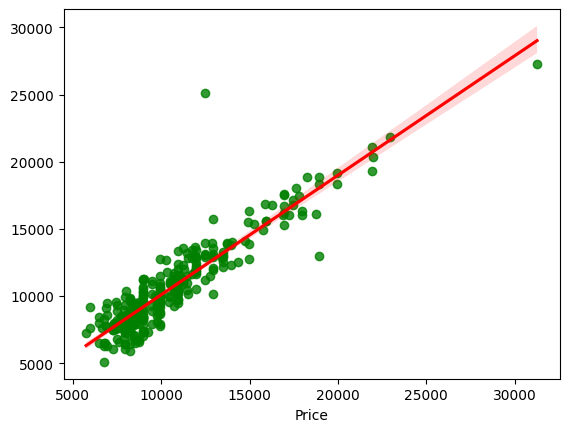

In [ ]:
sns.regplot(data=cars1,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})

By using statsmodel

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type',data=cars1).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:04:41   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9852.8426   1478.988     -6.662      0.000   -1.28e+04   -6951.617
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
Fuel_Type    617.0386    145.592      4.238      0.000     331.441     902.637
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the above model is having high chance of multicollinearity.

In [ ]:
model2 = smf.ols('Price~cc',data=cars1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.29e-06
Time:                        16:04:41   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model3 = smf.ols('Price~Doors',data=cars1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.40e-12
Time:                        16:04:41   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4 = smf.ols('Price~Doors+cc',data=cars1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.55e-15
Time:                        16:04:41   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model5 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors', data=cars1).fit()

In [ ]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1262.
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:05:14   Log-Likelihood:                -12578.
No. Observations:                1435   AIC:                         2.517e+04
Df Residuals:                    1429   BIC:                         2.520e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.508e+04    405.423     37.200      0.000    1.43e+04    1.59e+04
Age_08_04   -150.3257      2.626    -57.239      0.000    -155.477    -145.174
KM            -0.0131      0.001     -9.645      0.000      -0.016      -0.010
HP            34.3275      2.924     11.741      0.000      28.592      40.063
cc             0.4678      0.099      4.719      0.000       0.273       0.662
Doors        180.9328     43.812      4.130      0.000      94.991     266.875
==============================================================================
Omnibus:                      400.723   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.146
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       9.739   Cond. No.                     7.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model5.resid.mean()

3.7125332884568373e-09

In [ ]:
model5.resid_pearson

array([-1.33741699, -0.9580817 , -0.99538314, ...,  0.13573107,
       -0.76650015, -1.37497569])

<Axes: ylabel='Frequency'>

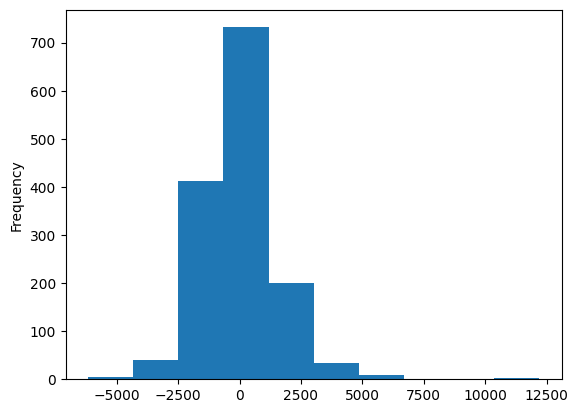

In [ ]:
model5.resid.plot(kind='hist')

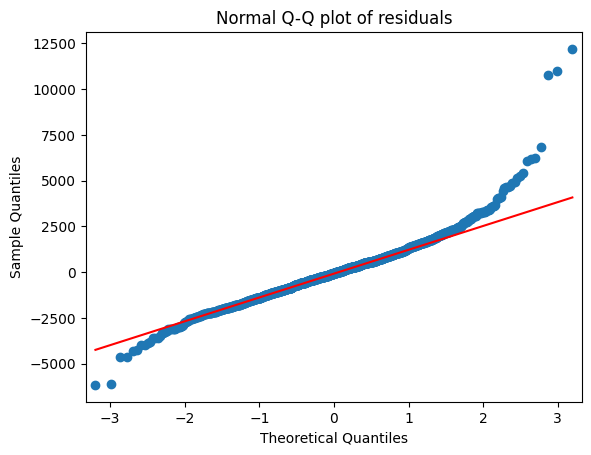

In [ ]:
import statsmodels.api as smi
qqplot = smi.qqplot(model5.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Apply lasso and ridge regression

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score

gives y_pred values

In [ ]:
#r2_score(y_test,y_pred)

In [ ]:
#lasso.coef_

In [ ]:
#lasso.intercept_

In [ ]:
params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
grid_search = GridSearchCV(Lasso(),params)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
grid_search.best_params_

{'alpha': 1}

In [ ]:
lasso1=Lasso(alpha=6)

In [ ]:
lasso1.fit(x_train,y_train)

Lasso(alpha=6)

In [ ]:
y_pred1 = lasso1.predict(x_test)

In [ ]:
r2_score(y_test,y_pred1)

0.8335418412619794

In [ ]:
lasso = Lasso(alpha=1)

In [ ]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [ ]:
y_pred = lasso.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8329274236492012

In [ ]:
lasso.coef_

array([-1.21806688e+02, -1.68887372e-02,  8.31171849e+02,  2.38108091e+01,
        3.55078484e+02, -9.66461592e-02, -5.99735870e+01,  0.00000000e+00,
        4.12073430e+02,  2.35730623e+01])

In [ ]:
lasso.intercept_

-12243.367823426022

In [ ]:
#ridge
ridge = Ridge()

In [ ]:
params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
grid_search = GridSearchCV(Ridge(),params)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
grid_search.best_params_

{'alpha': 1}

In [ ]:
r2_score(y_test,y_pred)

0.8329274236492012

In [ ]:
ridge = Ridge(alpha=5)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8334133526164446

In [ ]:
ridge.coef_

array([-1.21765786e+02, -1.70319197e-02,  7.87647751e+02,  2.42579278e+01,
        3.49513588e+02, -9.85473954e-02, -5.99938211e+01,  0.00000000e+00,
        3.85581587e+02,  2.34089339e+01])

In [ ]:
ridge.intercept_

-11887.340534439074

done with data cleaning and visualization and applying ridge and lasso techniques

**Questions Asked**

**Q1)**Normalization: it scales numerical fetaures to a range between 0 and 1. Helps when algorithms are sensitive to the scale of input features like K-Nearest Neighbors or Neural Networks.


Standardization: it transforms data to have a mean of 0 and SD of 1.helps with the algorithms that assume data is normally distributed, like Linear Regression and Logistic Regression.


**Q2)**Some we can use to address multi-collinearity in muliplr linear regression are:
feature removal ; Feature combination ;
regularization ; pca ; variance  inflation factor.